In [429]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats as sps
numsims=500
N = 600
X0 = 1
V0 = 1
t0 = 0
T = 0.6
theta=0
alpha=0.05
beta=0.5
dt=float((T-t0)/N)
t=np.arange(t0,T,dt)
dW1=np.zeros(N)
dW1[0]=0
dW2=np.zeros(N)
dW2[0]=0
dW3=np.zeros(N)
dW3[0]=0
X=np.zeros(N)
X[0]=X0
V=np.zeros(N)
V[0]=V0

Vfinal=np.zeros(N)
Vfinal[0]=V0
V2final=np.zeros(N)
V2final[0]=V0
V2=np.zeros(N)
V2[0]=V0
VT=np.zeros(numsims)
# Xfinal=np.zeros(N)
# Xfinal[0]=X0

for k in range(numsims):
    for i in range(1, t.size):
        dW1[i] = np.random.normal(loc = 0.0, scale = np.sqrt(dt))
        dW2[i] = np.random.normal(loc = 0.0, scale = np.sqrt(dt))
        dW3[i] = np.random.normal(loc = 0.0, scale = np.sqrt(dt))
        X[i]=X[i-1]+(0.05-X[i-1])*dt+0.02*dW3[i-1]
        h1=(theta/2+1.15-2*X[i-1])/(1.04*(theta/2+1))
        h2=1-h1
        V[i]=V[i-1]+V[i-1]*(h1*(0.15-X[i-1])+h2*X[i-1])*dt+h1*V[i-1]*dW1[i-1]*0.2+h2*V[i-1]*dW2[i-1]
        if(i>=beta*N and i<beta*N+1):
            h10=h1
            h20=h2
        
        if(i>=beta*N):
            V2[i]=V2[i-1]+V2[i-1]*(h10*(0.15-X[i-1])+h20*X[i-1])*dt+h10*V2[i-1]*dW1[i-1]*0.2+h20*V2[i-1]*dW2[i-1]
        else:
            V2[i]=V[i]
#         print(i,h1,h10)
        Vfinal[i]+=V[i]
        V2final[i]+=V2[i]
    h10=0
    h20=0
    VT[k]=V[N-1]-V2[N-1] 
    
Vfinal/=numsims
Vfinal[0]*=numsims
V2final/=numsims
V2final[0]*=numsims
print("ОК")

ОК


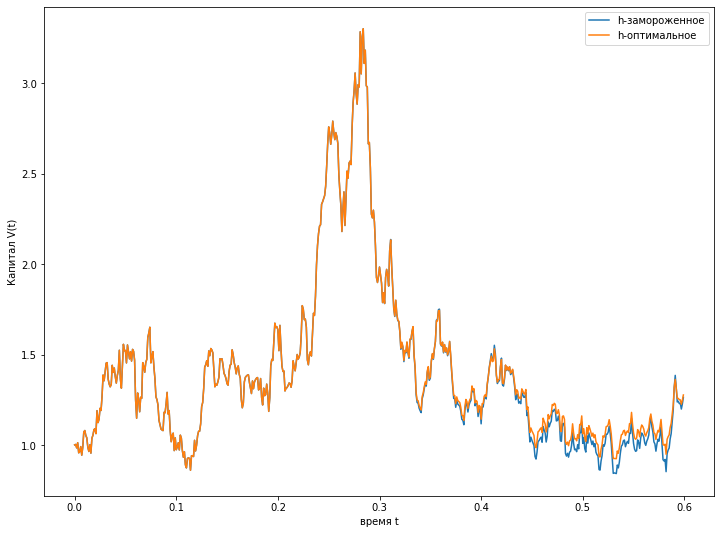

In [430]:
plt.figure(figsize=(12,9))
plt.plot(t,V2,label='h-замороженное')
plt.plot(t,V,label='h-оптимальное')
plt.xlabel("время t")
plt.ylabel("Капитал V(t)")
plt.legend()
plt.show()

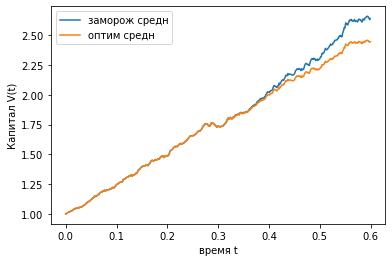

In [431]:
plt.plot(t,V2final,label='заморож средн')
plt.plot(t,Vfinal,label='оптим средн')
plt.xlabel("время t")
plt.ylabel("Капитал V(t)")
plt.legend()
plt.show()

-1.1030622989079575


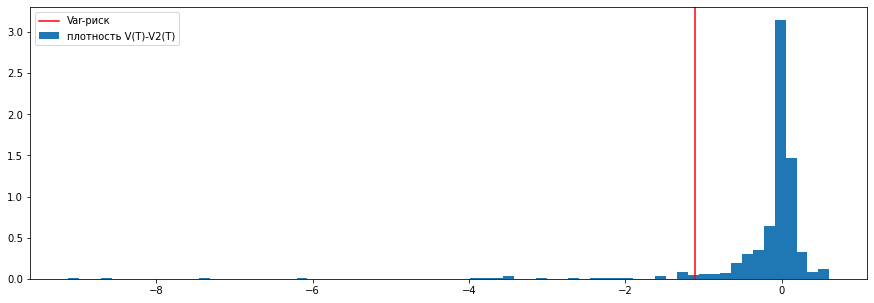

In [436]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import math
# import statistics
# import scipy.stats as sps
# alpha=0.05
# numsims=100
# N = 600
# X0 = 1
# V0 = 1
# t0 = 0
# T = 0.6
# theta=0
# dt=float((T-t0)/N)
# t=np.arange(t0,T,dt)
# dW1=np.zeros(N)
# dW1[0]=0
# dW2=np.zeros(N)
# dW2[0]=0
# dW3=np.zeros(N)
# dW3[0]=0
# X=np.zeros(N)
# X[0]=X0
# V=np.zeros(N)
# V[0]=V0

# VT=np.zeros(numsims)
# # Xfinal=np.zeros(N)
# # Xfinal[0]=X0

# for k in range(numsims):
#     for i in range(1, t.size):
#         dW1[i] = np.random.normal(loc = 0.0, scale = np.sqrt(dt))
#         dW2[i] = np.random.normal(loc = 0.0, scale = np.sqrt(dt))
#         dW3[i] = np.random.normal(loc = 0.0, scale = np.sqrt(dt))
#         X[i]=X[i-1]+(0.05-X[i-1])*dt+0.02*dW3[i-1]
# #         h1=(theta/2+1.15-2*X[i-1])/(1.04*(theta/2+1))
# #         h2=1-h1
#         h1=1
#         h2=1-h1
#         V[i]=V[i-1]+V[i-1]*(h1*(0.15-X[i-1])+h2*X[i-1])*dt+h1*V[i-1]*dW1[i-1]*0.2+h2*V[i-1]*dW2[i-1]
#     VT[k]=V[N-1]
plt.figure(figsize=(15,5))
plt.hist(VT, density=True, bins=70,label='плотность V(T)-V2(T)')
K=round(alpha*numsims-1/2)
pribil=VT
pribil=np.sort(pribil)
Var=0
K=round(alpha*(numsims-1)+0.5)
if(K+1<alpha*numsims):
    Var=pribil[K+1]
elif(K+1==alpha*numsims):
    Var=(pribil[K]+pribil[K+1])/2
else:
    Var=pribil[K]
print(Var)
plt.axvline(x=Var,color='r',label='Var-риск')
plt.legend()

In [433]:
#характеристики
print(pribil[0:5])
print(np.mean(pribil))
print(np.max(pribil))
print(np.min(pribil))
print(np.median(pribil))

[-9.12953485 -8.69671756 -7.38689959 -6.09075108 -3.871771  ]
-0.1937610802022561
0.6091241506953073
-9.129534849390385
0.008280962589041319


-0.947686033751146


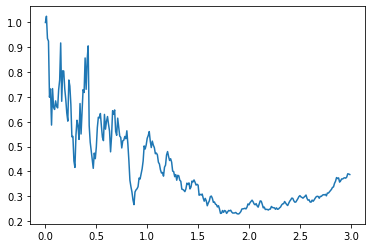

In [323]:
plt.plot(t,V)
plt.show()

In [179]:
pribil=VT-V0
pribil=np.sort(pribil)
Var=0
K=round(alpha*(numsims-1)+0.5)
if(K+1<alpha*numsims):
    Var=pribil[K+1]
elif(K+1==alpha*numsims):
    Var=(pribil[K]+pribil[K+1])/2
else:
    Var=pribil[K]
Var

-0.7440503134557759

1.0007970487988112